In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/most-wickets-in-odi-history/ODI Wickets.csv


In [2]:
odi_data = pd.read_csv('/kaggle/input/most-wickets-in-odi-history/ODI Wickets.csv')
odi_data.head()

,Rank,Player,Country,Career Span,Matches,Innings,Balls,Runs,Wickets,Average,Economy,Strike Rate,4,5,Best Figures
0,1,M Muralidaran,SL,18,350,341,18811,12326,534,23.08,3.93,35.2,15,10,7/30
1,2,Wasim Akram,PAK,19,356,351,18186,11812,502,23.52,3.89,36.2,17,6,5/15
2,3,Waqar Younis,PAK,14,262,258,12698,9919,416,23.84,4.68,30.5,14,13,7/36
3,4,WPUJC Vaas,SL,14,322,320,15775,11014,400,27.53,4.18,39.4,9,4,8/19
4,5,Shahid Afridi,PAK,19,398,372,17670,13632,395,34.51,4.62,44.7,4,9,7/12


In [3]:
odi_data.tail()

,Rank,Player,Country,Career Span,Matches,Innings,Balls,Runs,Wickets,Average,Economy,Strike Rate,4,5,Best Figures
74,75,JO Holder,WI,9,131,127,6043,5555,153,36.30,5.51,39.4,5,2,5/27
75,76,BAW Mendis,SL,7,87,84,4154,3324,152,21.86,4.80,27.3,7,3,6/13
76,77,Mohammed Shami,INDIA,9,82,81,4188,3910,152,25.72,5.60,27.5,9,1,5/69
77,78,UDU Chandana,SL,13,147,136,6142,4818,151,31.90,4.70,40.6,4,1,5/61
78,79,R Ashwin,INDIA,12,113,111,6141,5058,151,33.49,4.94,40.6,1,0,4/25


In [4]:
odi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          79 non-null     int64  
 1   Player        79 non-null     object 
 2   Country       79 non-null     object 
 3   Career Span   79 non-null     int64  
 4   Matches       79 non-null     int64  
 5   Innings       79 non-null     int64  
 6   Balls         79 non-null     int64  
 7   Runs          79 non-null     int64  
 8   Wickets       79 non-null     int64  
 9   Average       79 non-null     float64
 10  Economy       79 non-null     float64
 11  Strike Rate   79 non-null     float64
 12  4             79 non-null     int64  
 13  5             79 non-null     int64  
 14  Best Figures  79 non-null     object 
dtypes: float64(3), int64(9), object(3)
memory usage: 9.4+ KB


In [5]:
columns = odi_data.columns
print(columns)

Index(['Rank', 'Player', 'Country', 'Career Span', 'Matches', 'Innings',
       'Balls', 'Runs', 'Wickets', 'Average', 'Economy', 'Strike Rate', '4',
       '5', 'Best Figures'],
      dtype='object')


In [6]:
odi_data.describe()

,Rank,Career Span,Matches,Innings,Balls,Runs,Wickets,Average,Economy,Strike Rate,4,5
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,40.000000,12.987342,192.506329,179.556962,8761.177215,6634.341772,232.341772,28.988354,4.619114,37.783544,6.405063,2.835443
std,22.949219,3.632099,82.382142,67.959782,3314.246744,2232.934730,83.918594,4.861297,0.528906,6.113173,3.539227,2.508603
min,1.000000,7.000000,82.000000,79.000000,4154.000000,2947.000000,151.000000,18.650000,3.300000,26.300000,1.000000,0.000000
25%,20.500000,10.000000,130.500000,127.000000,6141.500000,5052.500000,173.000000,24.900000,4.280000,32.950000,3.500000,1.000000
50%,40.000000,12.000000,170.000000,163.000000,8012.000000,6169.000000,199.000000,29.290000,4.670000,37.400000,6.000000,2.000000
75%,59.500000,15.000000,226.500000,217.500000,10708.500000,7941.000000,271.000000,32.100000,4.935000,41.150000,9.000000,4.000000
max,79.000000,23.000000,463.000000,372.000000,18811.000000,13632.000000,534.000000,44.480000,5.830000,52.500000,17.000000,13.000000


In [7]:
for value in columns:
  print(value, "\n",odi_data[value].value_counts())

Rank 
 1     1
51    1
58    1
57    1
56    1
     ..
26    1
25    1
24    1
23    1
79    1
Name: Rank, Length: 79, dtype: int64
Player 
 M Muralidaran      1
Saeed Ajmal        1
Imran Tahir        1
NW Bracken         1
NLTC Perera        1
                  ..
N Kapil Dev        1
M Ntini            1
Harbhajan Singh    1
Abdul Razzaq       1
R Ashwin           1
Name: Player, Length: 79, dtype: int64
Country 
 INDIA    14
PAK      12
AUS      10
SL        9
SA        8
NZ        8
WI        7
ENG       6
BAN       3
ZIM       1
AFG       1
Name: Country, dtype: int64
Career Span 
 12    15
14     9
10     9
13     7
8      5
11     5
18     4
15     4
16     4
7      4
19     3
17     3
9      3
20     2
22     1
23     1
Name: Career Span, dtype: int64
Matches 
 147    3
164    2
153    2
171    2
250    2
      ..
176    1
104    1
138    1
356    1
82     1
Name: Matches, Length: 67, dtype: int64
Innings 
 112    3
162    2
220    2
150    2
191    2
      ..
232    1
186    

534    1
227    1
225    1
207    1
156    1
      ..
158    3
157    3
269    3
173    3
203    3
Name: Wickets, Length: 62, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Wickets', ylabel='count'>

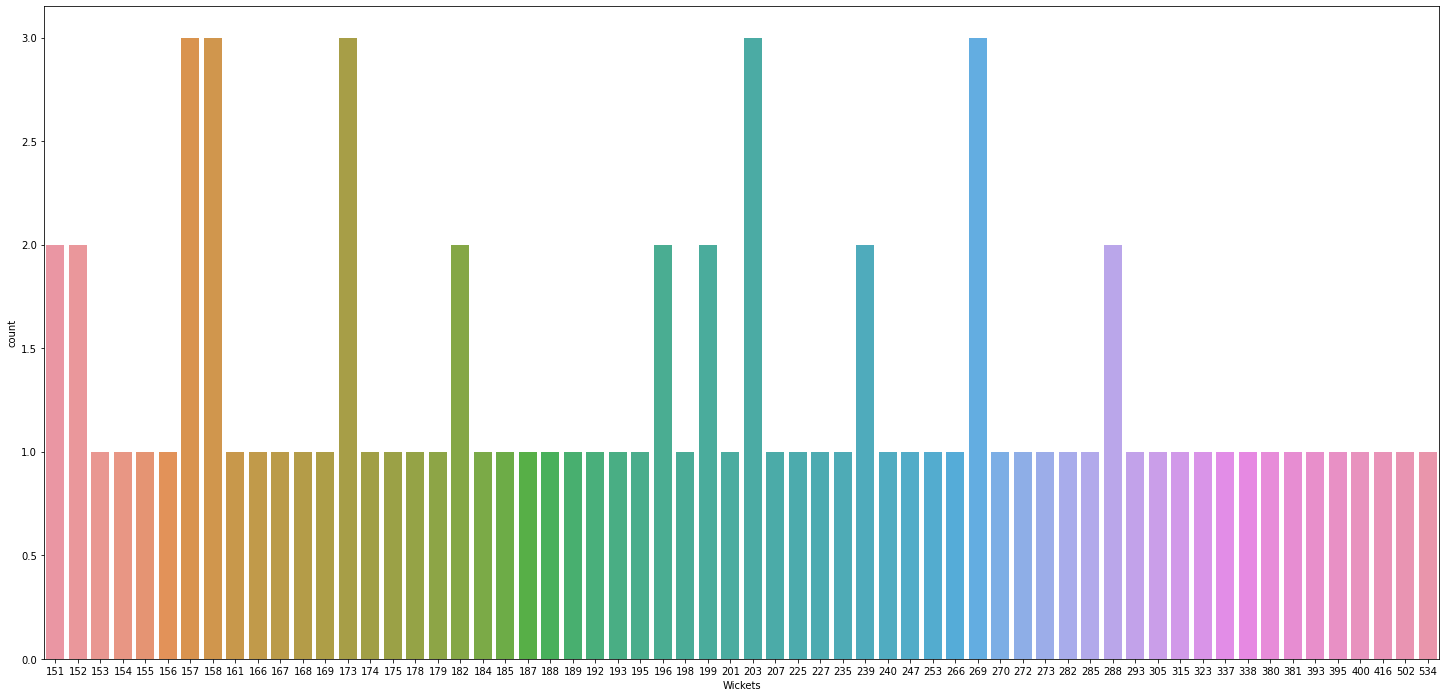

In [8]:
print(odi_data['Wickets'].value_counts(ascending=True))
plt.figure(figsize=(25,12))
sns.countplot(odi_data['Wickets'])

350    1
87     1
184    1
125    1
161    1
      ..
153    2
113    2
194    2
130    2
147    3
Name: Matches, Length: 67, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Matches', ylabel='count'>

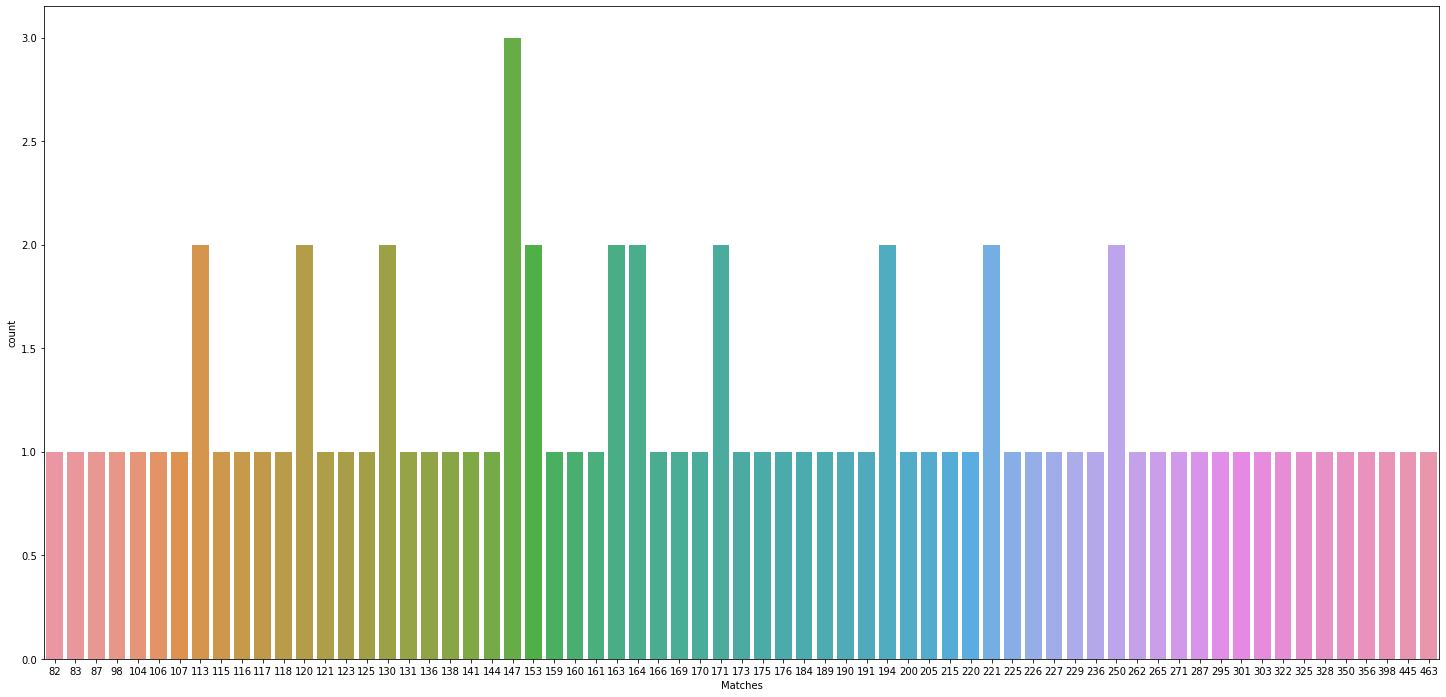

In [9]:
print(odi_data['Matches'].value_counts(ascending=True))
plt.figure(figsize=(25,12))
sns.countplot(odi_data['Matches'])

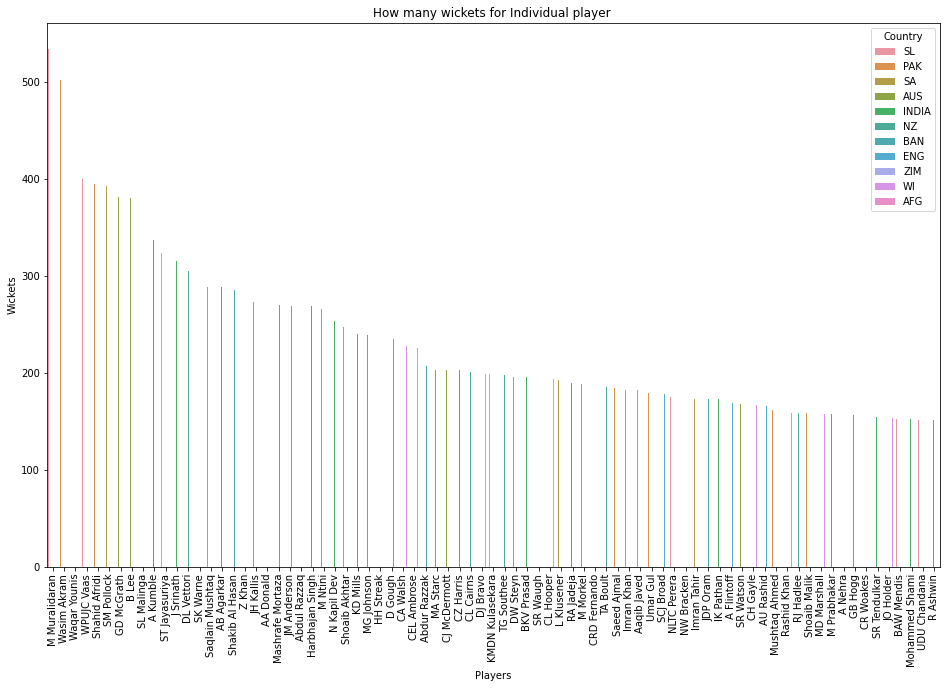

In [10]:
plt.figure(figsize=(16,10))
sns.barplot(x=odi_data['Player'],y=odi_data['Wickets'],hue=odi_data['Country'])
plt.title("How many wickets for Individual player ")
plt.xticks(rotation='90')
plt.xlabel('Players')
plt.ylabel('Wickets')
plt.show()


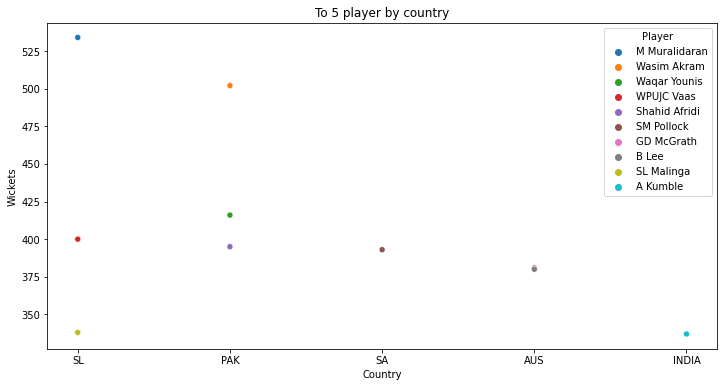

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=odi_data.Country[0:10],y=odi_data.Wickets[0:10],hue=odi_data.Player[0:10])
plt.title("To 5 player by country")
plt.xlabel('Country')
plt.ylabel('Wickets')
plt.show()